# Boston and Seattle Airbnb Dataset
Motivating Questions:
- How do the prices of Bostons Airbnbs change throughout the year?
- How about weekly? Can I pick a day of the week to book for cheaper?
- Do we see any significant seasonal change in pricing between Boston and Seattle?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#import Boston Data
boston_cal = pd.read_csv('Boston/calendar.csv')

In [3]:
boston_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

## Section 1: How do the prices of Bostons Airbnbs change throughout the year?

In [4]:
#data cleaning/engineering

#select only listings with available dates
boston_available_list = boston_cal[boston_cal['available'] == 't']

#convert price type to float
boston_available_list['price'] = boston_available_list['price'].replace('[\$,]', '', regex=True).astype('float')

#convert date type to datetime
boston_available_list['date'] = pd.to_datetime(boston_available_list['date']) 

In [5]:
boston_available_list

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0
...,...,...,...,...
1308875,14504422,2016-09-20,t,62.0
1308876,14504422,2016-09-19,t,62.0
1308877,14504422,2016-09-18,t,62.0
1308878,14504422,2016-09-17,t,62.0


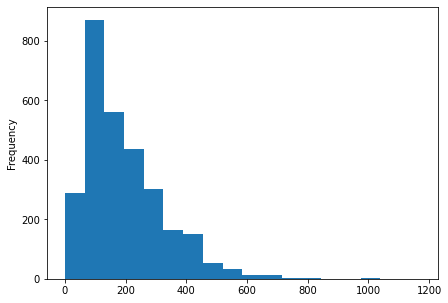

In [6]:
#distribution of average airbnb prices
boston_available_list.groupby('listing_id').mean()['price'].plot.hist(xlabel = 'average price per night', 
                                                               ylabel = 'count', bins=range(0, 1200, 65), figsize=(7,5));

In [7]:
#Number of listings available over time, with 7 day moving average
bos_available_count = pd.DataFrame(boston_available_list.groupby('date').count()['available'])
bos_available_count['7 Day MA'] = bos_available_count.rolling(window=7).mean()

In [8]:
#Average price of a listing over time, with 7 day moving average
bos_available_price = pd.DataFrame(boston_available_list.groupby('date').mean()['price'])
bos_available_price['7 Day MA'] = bos_available_price.rolling(window=7).mean()

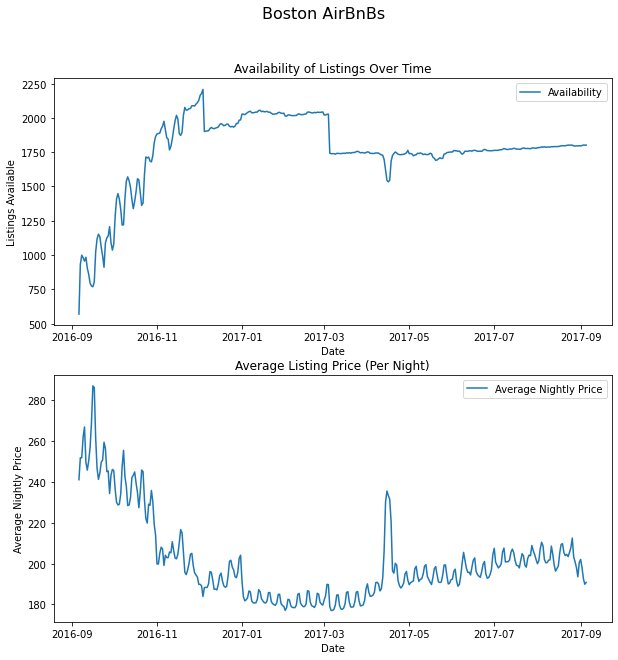

In [9]:
#Stack Plots - Original Data
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)
fig.suptitle('Boston AirBnBs', fontsize=16)

axs[0].plot(bos_available_count['available']);
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Listings Available');
axs[0].legend(['Availability'])
axs[0].set_title('Availability of Listings Over Time')


axs[1].plot(bos_available_price['price']);
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Nightly Price');
axs[1].legend(['Average Nightly Price'])
axs[1].set_title('Average Listing Price (Per Night)');

#fig.savefig('boston.png')

## Section 2: How about weekly? Can I pick a day of the week to book for cheaper?

In [10]:
#New columns for weekday number (for ordering) and weekday name
boston_available_list['Weekday'] = boston_available_list['date'].dt.dayofweek
boston_available_list['WeekdayName'] = boston_available_list['date'].dt.day_name()

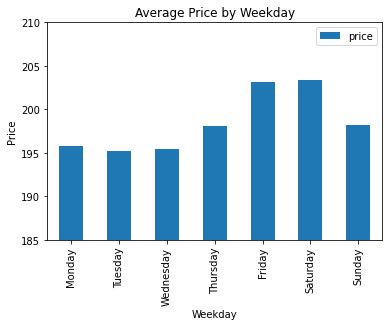

In [11]:
#Bar chart for average price by day of week
ax = boston_available_list.groupby(['Weekday', 'WeekdayName'], as_index=False).mean('price').plot.bar('WeekdayName', 'price', ylim=(185, 210), title='Average Price by Weekday', xlabel='Weekday', ylabel='Price');
fig = ax.get_figure()

#fig.savefig('weekly.jpeg')

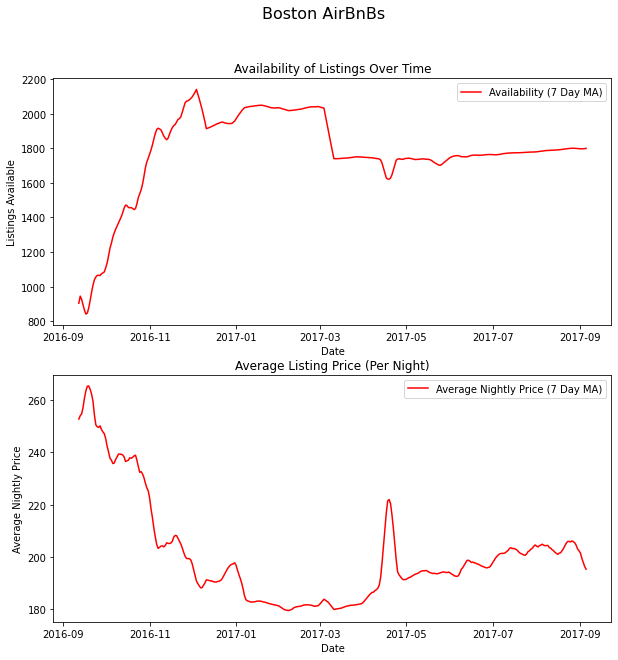

In [12]:
#Stack Plots - Moving Average
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)
fig.suptitle('Boston AirBnBs', fontsize=16) 

axs[0].plot(bos_available_count['7 Day MA'], color='red');
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Listings Available');
axs[0].legend(['Availability (7 Day MA)'])
axs[0].set_title('Availability of Listings Over Time')

axs[1].plot(bos_available_price['7 Day MA'], color='red');
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Nightly Price');
axs[1].legend(['Average Nightly Price (7 Day MA)'])
axs[1].set_title('Average Listing Price (Per Night)');

#fig.savefig('boston_ma.png')

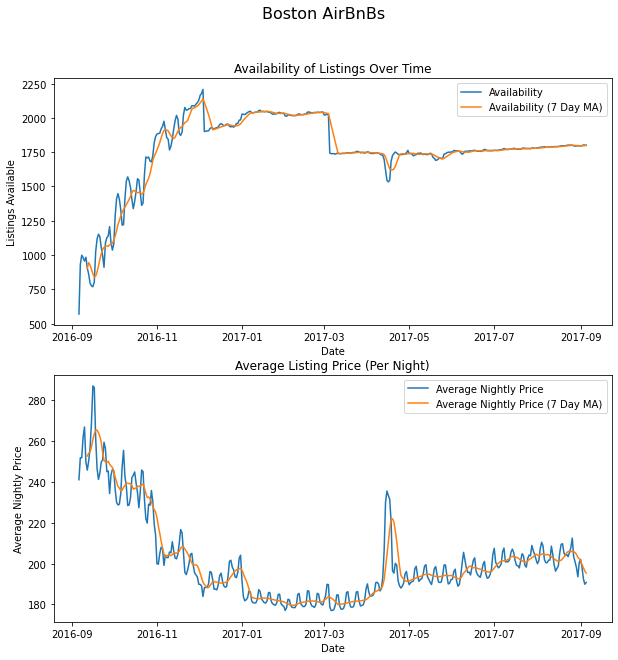

In [13]:
#Stack Plots - Original Data and MA
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)
fig.suptitle('Boston AirBnBs', fontsize=16)

axs[0].plot(bos_available_count);
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Listings Available');
axs[0].legend(['Availability','Availability (7 Day MA)'])
axs[0].set_title('Availability of Listings Over Time')

axs[1].plot(bos_available_price);
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Nightly Price');
axs[1].legend(['Average Nightly Price','Average Nightly Price (7 Day MA)']);
axs[1].set_title('Average Listing Price (Per Night)');

#fig.savefig('boston_combined.png')

## Section 3: Do we see any significant seasonal change in pricing between Boston and Seattle?

In [14]:
#import Seattle Data
seattle_cal = pd.read_csv('Seattle/calendar.csv')

In [15]:
#data cleaning/engineering

#select only listings with available dates
seattle_available_list = seattle_cal[seattle_cal['available'] == 't']

#convert price type to float
seattle_available_list['price'] = seattle_available_list['price'].replace('[\$,]', '', regex=True).astype('float')

#convert date type to datetime
seattle_available_list['date'] = pd.to_datetime(seattle_available_list['date']) 

In [16]:
seattle_available_list

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


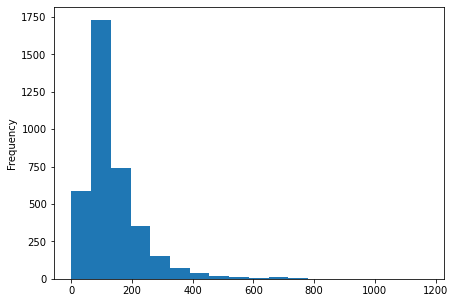

In [17]:
#distribution of average airbnb prices
seattle_available_list.groupby('listing_id').mean()['price'].plot.hist(xlabel = 'average price per night', 
                                                               ylabel = 'count', bins=range(0, 1200, 65), figsize=(7,5));

In [18]:
#Number of listings available over time, with 7 day moving average
sea_available_count = pd.DataFrame(seattle_available_list.groupby('date').count()['available'])
sea_available_count['7 Day MA'] = sea_available_count.rolling(window=7).mean()

In [19]:
#Average price of a listing over time, with 7 day moving average
sea_available_price = pd.DataFrame(seattle_available_list.groupby('date').mean()['price'])
sea_available_price['7 Day MA'] = sea_available_price.rolling(window=7).mean()

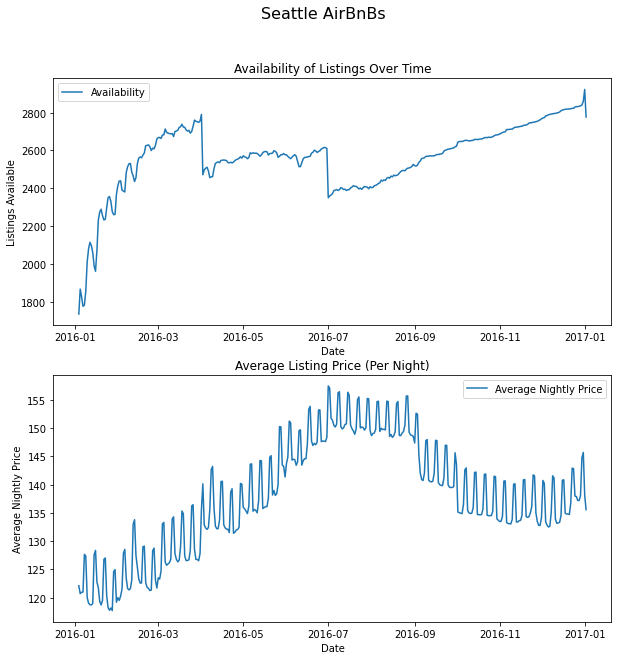

In [20]:
#Stack Plots - Original Data
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)
fig.suptitle('Seattle AirBnBs', fontsize=16)

axs[0].plot(sea_available_count['available']);
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Listings Available');
axs[0].legend(['Availability'])
axs[0].set_title('Availability of Listings Over Time')


axs[1].plot(sea_available_price['price']);
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Nightly Price');
axs[1].legend(['Average Nightly Price'])
axs[1].set_title('Average Listing Price (Per Night)');

#fig.savefig('seattle.png')

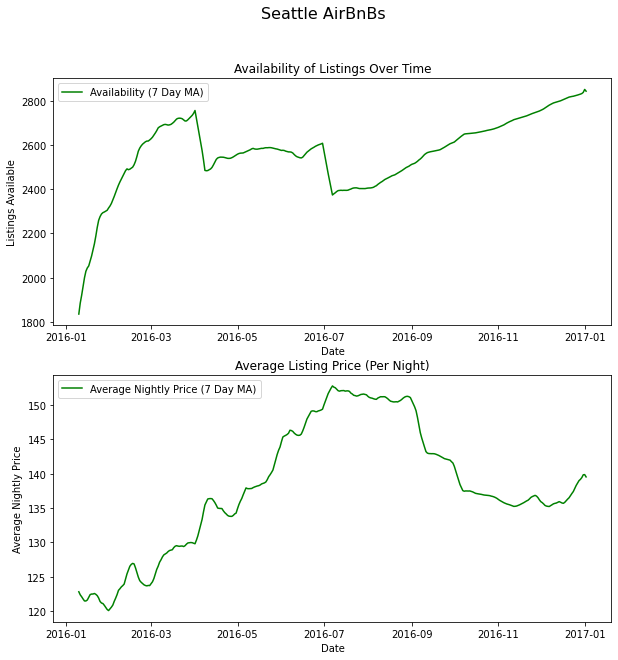

In [21]:
#Stack Plots - Moving Average
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)
fig.suptitle('Seattle AirBnBs', fontsize=16) 

axs[0].plot(sea_available_count['7 Day MA'], color='green');
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Listings Available');
axs[0].legend(['Availability (7 Day MA)'])
axs[0].set_title('Availability of Listings Over Time')

axs[1].plot(sea_available_price['7 Day MA'], color='green');
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Nightly Price');
axs[1].legend(['Average Nightly Price (7 Day MA)'])
axs[1].set_title('Average Listing Price (Per Night)');

#fig.savefig('seattle_ma.png')

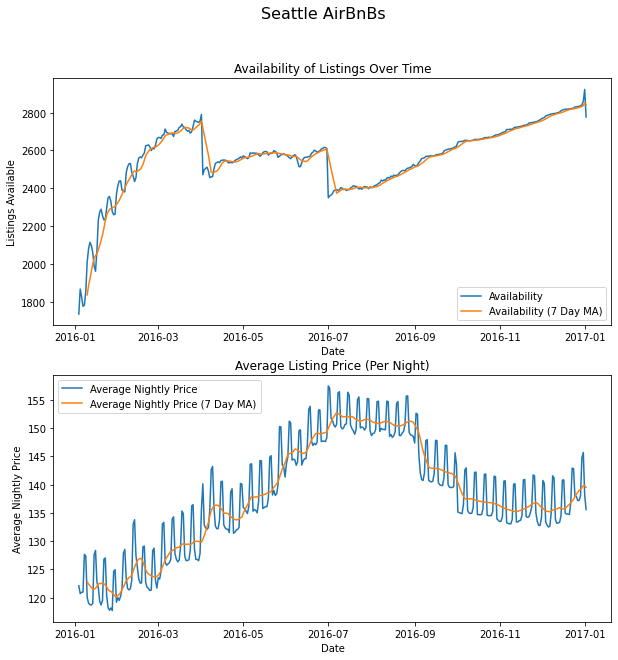

In [22]:
#Stack Plots - Original Data and MA
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)
fig.suptitle('Seattle AirBnBs', fontsize=16)

axs[0].plot(sea_available_count);
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Listings Available');
axs[0].legend(['Availability','Availability (7 Day MA)'])
axs[0].set_title('Availability of Listings Over Time')

axs[1].plot(sea_available_price);
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Nightly Price');
axs[1].legend(['Average Nightly Price','Average Nightly Price (7 Day MA)']);
axs[1].set_title('Average Listing Price (Per Night)');

fig.savefig('seattle_combined.png')

In [23]:
#To compare both datasets, we need to choose a window where the dates overlap

In [24]:
#Get date range to compare
print('Range of Boston Dates: ' + str(boston_available_list['date'].dt.date.min()) + ' to ' + str(boston_available_list['date'].dt.date.max()))
print('Range of Seattle Dates: ' + str(seattle_available_list['date'].dt.date.min()) + ' to ' + str(seattle_available_list['date'].dt.date.max()))

Range of Boston Dates: 2016-09-06 to 2017-09-05
Range of Seattle Dates: 2016-01-04 to 2017-01-02


In [25]:
#restrict to only overlapping dates
bos_available_subset = boston_available_list[(boston_available_list['date'] >= '2016-09-06') & (boston_available_list['date'] <= '2017-01-02')]
sea_available_subset = seattle_available_list[(seattle_available_list['date'] >= '2016-09-06') & (seattle_available_list['date'] <= '2017-01-02')]

In [26]:
#Number of listings available over time, with 7 day moving average
bos_available_count = pd.DataFrame(bos_available_subset.groupby('date').count()['available'])
bos_available_count['7 Day MA'] = bos_available_count.rolling(window=7).mean()

sea_available_count = pd.DataFrame(sea_available_subset.groupby('date').count()['available'])
sea_available_count['7 Day MA'] = sea_available_count.rolling(window=7).mean()

In [27]:
#Average price of a listing over time, with 7 day moving average
bos_available_price = pd.DataFrame(bos_available_subset.groupby('date').mean()['price'])
bos_available_price['7 Day MA'] = bos_available_price.rolling(window=7).mean()

sea_available_price = pd.DataFrame(sea_available_subset.groupby('date').mean()['price'])
sea_available_price['7 Day MA'] = sea_available_price.rolling(window=7).mean()

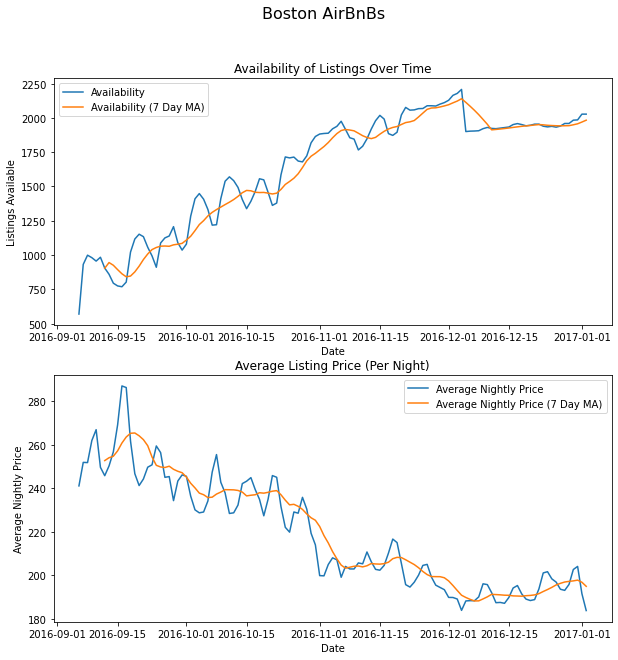

In [28]:
#Stack Plots - Original Data and MA (Boston)
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)
fig.suptitle('Boston AirBnBs', fontsize=16)

axs[0].plot(bos_available_count);
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Listings Available');
axs[0].legend(['Availability','Availability (7 Day MA)'])
axs[0].set_title('Availability of Listings Over Time')

axs[1].plot(bos_available_price);
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Nightly Price');
axs[1].legend(['Average Nightly Price','Average Nightly Price (7 Day MA)']);
axs[1].set_title('Average Listing Price (Per Night)');

#fig.savefig('boston_combined_subset.png')

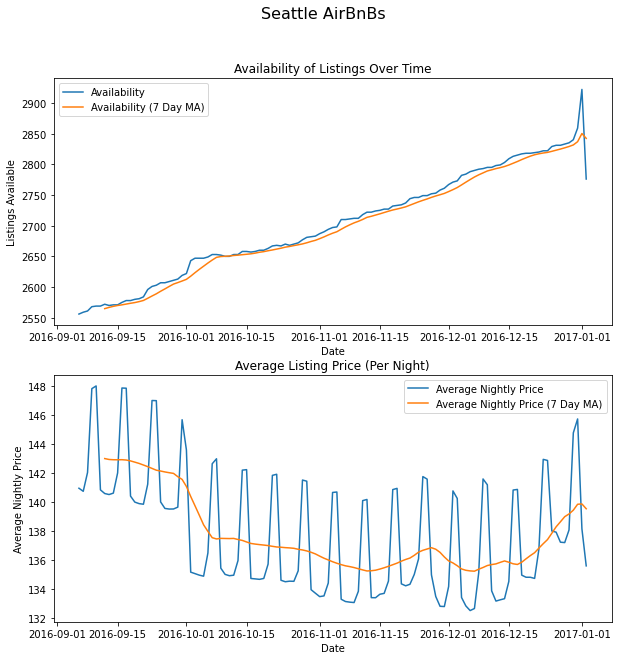

In [29]:
#Stack Plots - Original Data and MA (Seattle)
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)
fig.suptitle('Seattle AirBnBs', fontsize=16)

axs[0].plot(sea_available_count);
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Listings Available');
axs[0].legend(['Availability','Availability (7 Day MA)'])
axs[0].set_title('Availability of Listings Over Time')

axs[1].plot(sea_available_price);
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Nightly Price');
axs[1].legend(['Average Nightly Price','Average Nightly Price (7 Day MA)']);
axs[1].set_title('Average Listing Price (Per Night)');

#fig.savefig('seattle_combined_subset.png')